In [1]:
output_dir = "output/"
# run.py
from mesa.batchrunner import BatchRunner

from ecosystem.model import EcoModel

# fixed_params = {"width": 50,
#                 "height": 50,
#                 "b": 0.5,
#                 "m": 0.1}

# variable_params = {"b": range(0, 1, 2)}

# batch_run = BatchRunner(EcoModel,
#                         fixed_parameters=fixed_params,
#                         variable_parameters=None,  
#                         iterations=5,
#                         max_steps=100)
# batch_run.run_model()

In [2]:
from ecosystem.model import EcoModel
from mesa.datacollection import DataCollector
import time
start_time = time.time()

# fixed_params = {"width": 50,
#                 "height": 50,
#                 "b": 0.5,
#                 "m": 0.1}

model = EcoModel(50, 50, 0.4, 0.07)

for i in range(150):
    model.step()
    
print(time.time()-start_time)

Vegetated: 271
Empty: 390
Degraded: 1855
Vegetated: 255
Empty: 464
Degraded: 1788
Vegetated: 248
Empty: 528
Degraded: 1725
Vegetated: 247
Empty: 573
Degraded: 1682
Vegetated: 245
Empty: 576
Degraded: 1662
Vegetated: 262
Empty: 575
Degraded: 1660
Vegetated: 265
Empty: 572
Degraded: 1659
Vegetated: 269
Empty: 588
Degraded: 1639
Vegetated: 273
Empty: 620
Degraded: 1615
Vegetated: 265
Empty: 619
Degraded: 1605
Vegetated: 276
Empty: 633
Degraded: 1592
Vegetated: 275
Empty: 627
Degraded: 1603
Vegetated: 270
Empty: 605
Degraded: 1610
Vegetated: 285
Empty: 585
Degraded: 1622
Vegetated: 293
Empty: 609
Degraded: 1602
Vegetated: 289
Empty: 595
Degraded: 1610
Vegetated: 295
Empty: 582
Degraded: 1610
Vegetated: 308
Empty: 598
Degraded: 1609
Vegetated: 293
Empty: 583
Degraded: 1624
Vegetated: 293
Empty: 588
Degraded: 1613
Vegetated: 299
Empty: 588
Degraded: 1612
Vegetated: 300
Empty: 582
Degraded: 1614
Vegetated: 304
Empty: 567
Degraded: 1635
Vegetated: 298
Empty: 569
Degraded: 1627
Vegetated: 304
E

In [3]:
stats = model.datacollector.get_model_vars_dataframe()


In [4]:
stats.head(10)

,Degraded,Empty,Vegetated,qminusplus,qplusplus
0,2000,229,271,0.809963,0.108856
1,1855,390,255,0.615686,0.105882
2,1788,464,248,0.513105,0.129032
3,1725,528,247,0.418016,0.163968
4,1682,573,245,0.366327,0.177551
5,1662,576,262,0.341603,0.215649
6,1660,575,265,0.318868,0.252830
7,1659,572,269,0.308550,0.273234
8,1639,588,273,0.302198,0.280220
9,1615,620,265,0.291509,0.273585


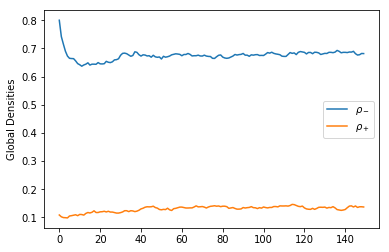

In [5]:
# Figure 3a 
# Plot the global densities at each time step



from matplotlib import pyplot as plt
total = (stats.Degraded+stats.Vegetated+stats.Empty)
plt.plot(stats.Degraded/(total), label = r'$\rho_-$')
plt.plot(stats.Vegetated/(total), label = r'$\rho_+$')
plt.legend()
plt.ylabel('Global Densities')
plt.savefig(output_dir+"Global_densities.png", format = 'png' )
plt.show()

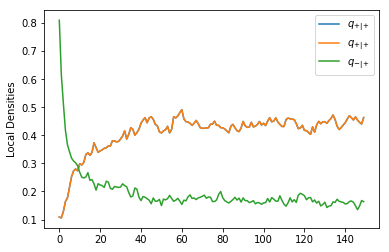

In [7]:
# Plot local densities
# q+|+ number of vegetated neighbours of vegetates sites
# q-|+ number of vegetated neighbours of degraded sites



from matplotlib import pyplot as plt

plt.plot(stats.qplusplus, label = r'$q_{+|+}$')
plt.plot(stats.qminusplus, label = r'$q_{-|+}$')
plt.legend()
plt.ylabel('Local Densities')
plt.savefig(output_dir + "Local_densities.png", format = 'png' )
plt.show()



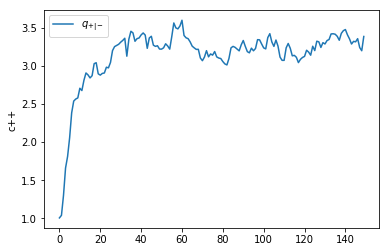

In [8]:
from matplotlib import pyplot as plt
plt.plot(stats.qplusplus/(stats.Vegetated/(total)), label = r'$q_{+|-}$')
plt.legend()
plt.ylabel('c++')
plt.savefig(output_dir + "Clustering_intensity.png", format = 'png' )
plt.show()


In [9]:
# Pair approximation model

def pair_approx_model(r_ev,r_vv,):
    
    ## r_vv : rho_{vegetaged|vegetated}
    ## r_vd : rho_{vegetaged|degraded}
    dr_vv = 2* r_ev* w_ev - 2 * r_vv * w_ve
    dr_vd = r_ed * w_ev + r_ev*w_ed - r_vd*(w_ve + w_de)
    dr_dd = 2* r_ed * w_ed - 2* r_dd*w_de
    dr_v = r_e*w_ev - r_v*w_ve
    dr_d = r_e*w_ed - r_d*w_de
    
    
    return [dr_vv,dr_vd,dr_dd,dr_v,dr_d]

In [10]:
def pair_approx_model(r_init,t, delta, c , r, d, f, m, b,z):
    
    ## r_pp: rho_{vegetaged|vegetated}
    ## r_pm : rho_{vegetaged|degraded}
    ## r_pp, r_pm, r_mm, r_00
    r_p, r_0 ,r_m, r_pp, r_pm, r_p0, r_mm, r_m0, r_00 = r_init
      
    dr_pm = d*(r_p - r_pm - r_pp ) + ( r_m - r_mm - r_pm) * ( delta * r_p + \
            (z-1)/z*(1-delta) * (r_p - r_pm - r_pp)/(1-r_p-r_m) ) *  (b-c*r_p) \
            - r_pm*(r + f/z + (z-1)/z*f*(r_pm/r_m) + m)
    
    dr_pp = 2*(r_p - r_pm - r_pp ) * (delta * r_p +  (1-delta)/z + \
            (z-1)/z*(1-delta) * (r_p - r_pm - r_pp)/(1-r_p-r_m)) *  (b-c*r_p) - 2*r_pp * m 
            
    dr_mm = 2*d*(r_m - r_mm - r_pm ) - 2*r_mm*(r + (z-1)/z*f*r_pm/r_m )
    
    dr_p = (delta * r_p + (1-delta)*(r_p + r_pm - r_pp)/( 1- r_p - r_m )) * (b - c*r_p)*\
            (1 - r_p - r_m) - m*r_p
        
    dr_m = d*(1-r_p - r_m) - (r + f * r_pm / r_m) * r_m
    
#     CONSERVATION equations

    dr_0 =  - dr_p - dr_m
    dr_p0 = dr_p - dr_pp - dr_pm
    dr_m0 = dr_m - dr_mm - dr_pm
    dr_00 = dr_0 - dr_p0 - dr_m0

    
    return [dr_p, dr_0 ,dr_m, dr_pp, dr_pm, dr_p0, dr_mm, dr_m0, dr_00] 

    
  
#r_pp = r_p - ( r_p0 + r_pm )

#r_00 = r_0 - (r_0p + r_0m)
#r_00 = r_0 - (r_p0 + r_0m)
 
#r_mm = r_m - (r_m0 + r_mp)
#r_mm = r_m - (r_0m + r_pm)



In [23]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

delta = 0
c = 0.3
r = 0
d = 0.2
f = 0.8
m = 0.07
b = 0.4
r_0 = 1/3

#r_m = 1/3
#r_p = 1/3

r_0 = 0.1

r_m = 0.8
r_p = 0.1
z = 4

r_pp = r_p*r_p
r_pm = r_p*r_m
r_p0 = r_p*r_0
r_mm = r_m*r_m
r_m0 = r_m*r_0
r_00 = r_0*r_0
    
r_init = [r_p, r_0 ,r_m, r_pp, r_pm, r_p0, r_mm, r_m0, r_00]

t = np.linspace(0, 100, 101)


y = odeint(pair_approx_model, r_init, t ,args = (delta, c , r, d, f, m, b,z))


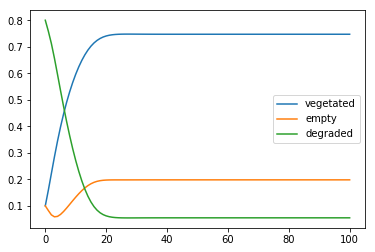

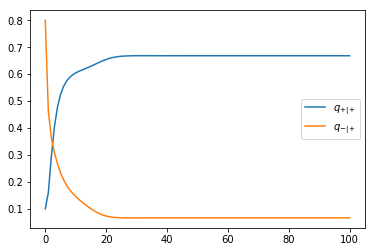

In [24]:

plt.plot(y.T[0], label = "vegetated" )
plt.plot(y.T[1], label = "empty")
plt.plot(y.T[2], label = "degraded")
plt.legend()

plt.show()

plt.plot(y.T[3]/y.T[0], label = "$q_{+|+}$" )
plt.plot(y.T[4]/y.T[0], label = "$q_{-|+}$")
plt.legend()

plt.show()

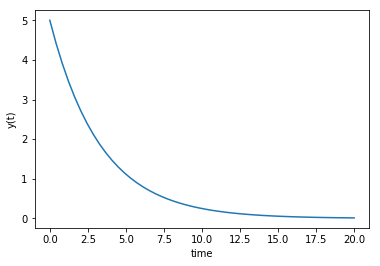

In [14]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt



# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()